<a href="https://colab.research.google.com/github/JungMYEONG-jin/Stats_Project/blob/window/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [1]:
!nvidia-smi

Tue Apr  6 05:19:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_img.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_img.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))


In [12]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
train_img = train_img.reshape((60000, 28*28))
train_img = train_img.astype("float32")/255

test_img = test_img.reshape((10000, 28*28))
test_img = test_img.astype("float32")/255

In [14]:
 from tensorflow.keras.utils import to_categorical

 train_labels = to_categorical(train_labels)
 test_labels = to_categorical(test_labels)

In [16]:
train_labels[:4] # one hot encoding

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
network.fit(train_img, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 2ms/step - loss: 0.3679 - accuracy: 0.8880
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0942 - accuracy: 0.9719
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0628 - accuracy: 0.9815
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0457 - accuracy: 0.9861
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0322 - accuracy: 0.9906


In [19]:
test_loss, test_acc = network.evaluate(test_img, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9806


In [20]:
test_loss

0.07001011818647385

In [21]:
test_acc

0.9805999994277954

In [25]:
(train_imgs, train_labels2), (test_imgs, test_labels2) = mnist.load_data()
digit = train_imgs[4]

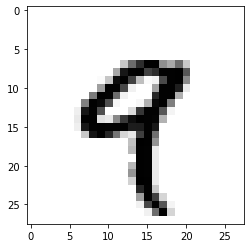

In [26]:
import matplotlib.pyplot as plt

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [28]:
ms = train_imgs[10:100]
print(ms.shape)

(90, 28, 28)


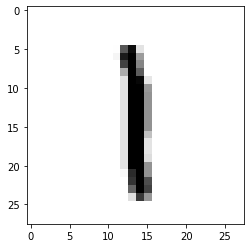

In [29]:
plt.imshow(ms[4], cmap = plt.cm.binary)
plt.show()

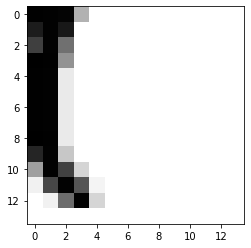

In [31]:
ms = train_imgs[:, 14:, 14:]
plt.imshow(ms[4], cmap = plt.cm.binary)
plt.show()

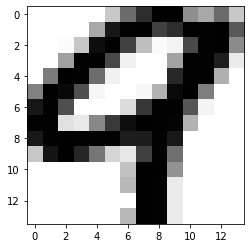

In [32]:
ms = train_imgs[:, 7:-7, 7:-7]
plt.imshow(ms[4], cmap = plt.cm.binary)
plt.show()

In [33]:
batch = train_imgs[:128]

In [34]:
# second
batch = train_imgs[128:256]

In [35]:
batch.shape

(128, 28, 28)

# broadcasting

In [38]:
x = np.array([1,2,3])
y = np.array([[1,2,3], [1,1,1]])

In [39]:
y+x

array([[2, 4, 6],
       [2, 3, 4]])

# Tensor dot

In [41]:
a = np.array([2,3,3])

In [42]:
z = np.dot(a,x)

In [43]:
z # 2 + 6 + 9

17

# Reshape

In [45]:
x = np.array([[0,1.], [2., 3.], [4., 5.]])
print(x)
z = x.reshape((6, 1))
print(z)
z = x.reshape((2,3))
print(z)

[[0. 1.]
 [2. 3.]
 [4. 5.]]
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[0. 1. 2.]
 [3. 4. 5.]]
